In [1]:
import pandas as pd
import yellowbrick
import numpy as np

data = pd.read_csv('Leisure data 2018.csv')
print("The dimension of the table is: ", data.shape, "\n")
print(data.head(5))

The dimension of the table is:  (55, 7) 

                        Activity Locality  Participated in the last 12 months  \
0        Adult education courses    Local                               18215   
1            Aquarium attendance   Remote                               12760   
2                Attend a circus   Remote                                6826   
3  Attend a state or county fair   Remote                               30829   
4  Attend art galleries or shows   Remote                               17772   

   Weekly Participation (multiple)  Weekly Participation (once)  \
0                             3987                         1864   
1                              147                          118   
2                               65                          104   
3                              222                          678   
4                               92                          203   

   Monthly Participation (multiple)  Monthly Participation (once)  


In [2]:
print("Describe Data")
print(data.describe())
print("\nSummarized Data")
print(data.describe(include=['O']))

Describe Data
       Participated in the last 12 months  Weekly Participation (multiple)  \
count                           55.000000                        55.000000   
mean                         24255.163636                      4094.000000   
std                          22468.298603                      6993.811328   
min                           3607.000000                        64.000000   
25%                          10184.500000                       264.000000   
50%                          17338.000000                      1408.000000   
75%                          28035.000000                      5038.500000   
max                         125222.000000                     40948.000000   

       Weekly Participation (once)  Monthly Participation (multiple)  \
count                    55.000000                         55.000000   
mean                   2187.072727                       2676.781818   
std                    4034.762345                       4840.86271

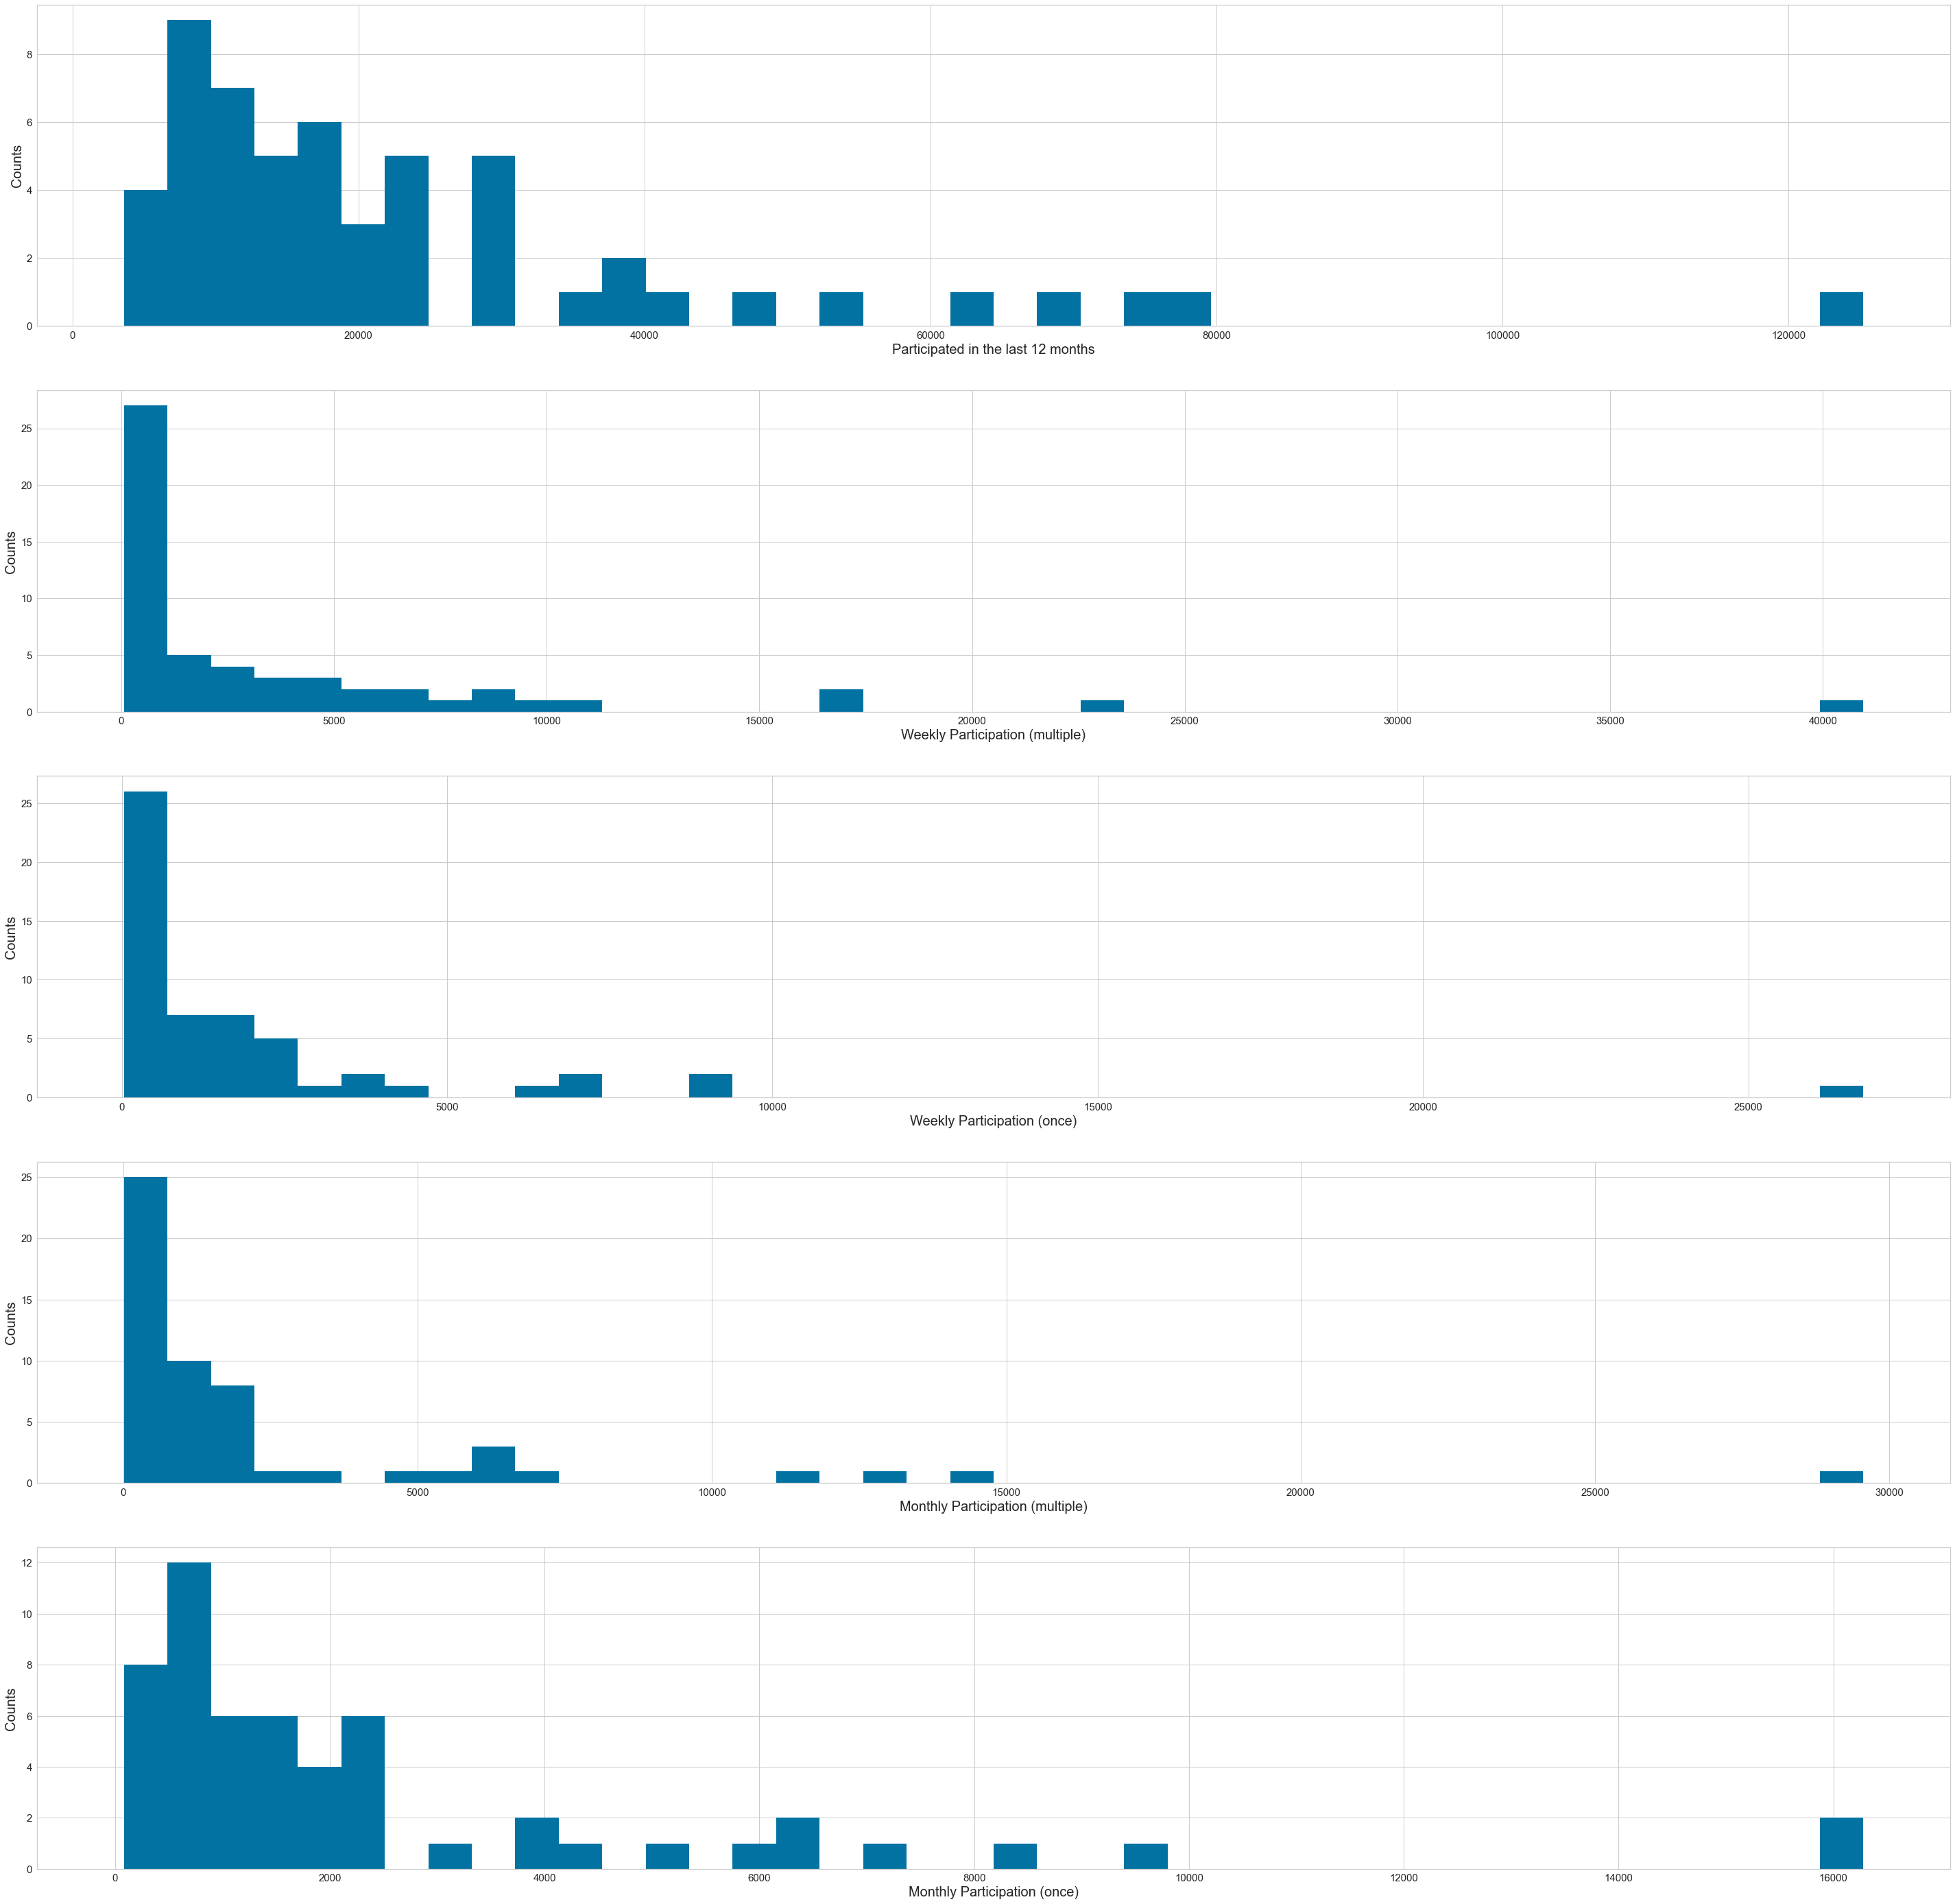

In [3]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (50, 50)
fig, axes = plt.subplots(nrows = 5, ncols = 1)

num_features = ['Participated in the last 12 months', 'Weekly Participation (multiple)', 'Weekly Participation (once)', 'Monthly Participation (multiple)', 'Monthly Participation (once)']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts', 'Counts']
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

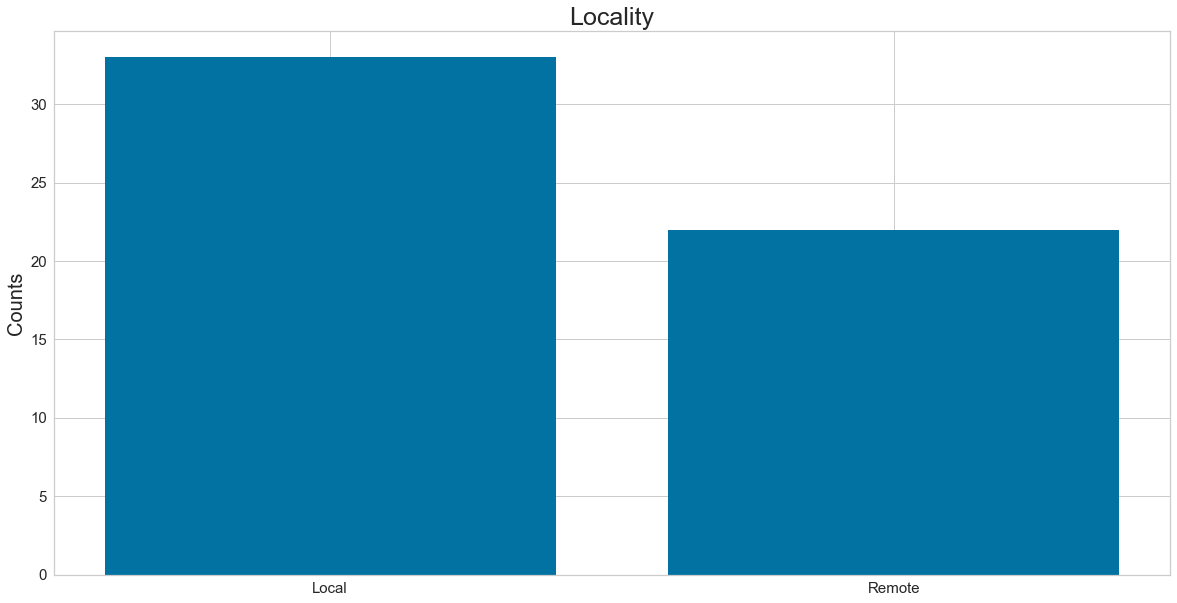

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
X_Locality = data.groupby('Locality').size().reset_index(name='Counts')['Locality']
Y_Locality = data.groupby('Locality').size().reset_index(name='Counts')['Counts']
plt.bar(X_Locality, Y_Locality)
plt.title('Locality', fontsize=25)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()

C:\Users\mithr\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


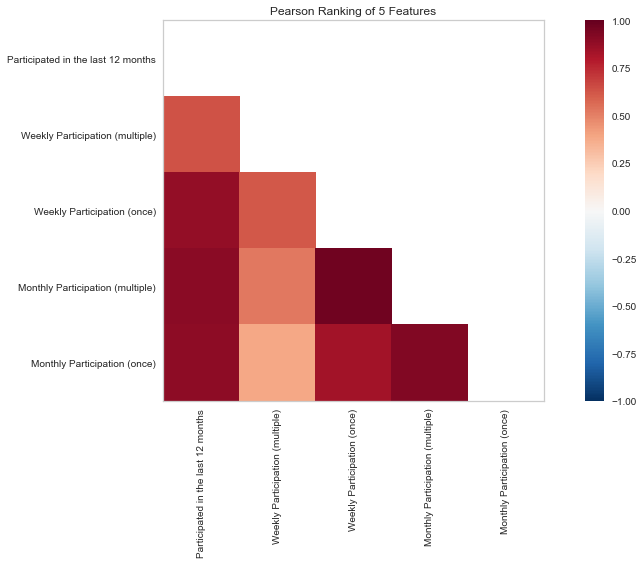

In [5]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
from yellowbrick.features import Rank2D
X = data[num_features].as_matrix()

visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)
visualizer.transform(X)
visualizer.poof(outpath="leisurecoords1.png")
plt.show()

C:\Users\mithr\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()
C:\Users\mithr\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


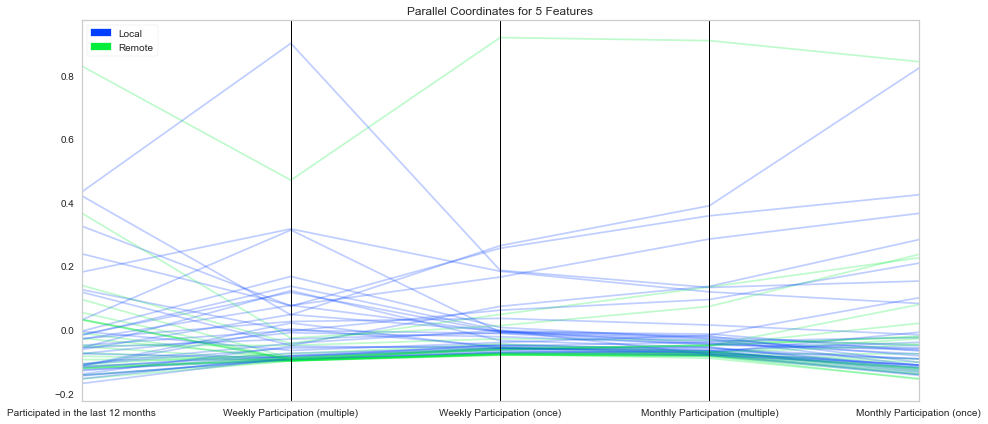

In [6]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

from yellowbrick.style import set_palette
set_palette('sns_bright')

from yellowbrick.features import ParallelCoordinates
classes = ['Local', 'Remote']
num_features = ['Participated in the last 12 months', 'Weekly Participation (multiple)', 'Weekly Participation (once)', 'Monthly Participation (multiple)', 'Monthly Participation (once)']

data_norm = data.copy()
for feature in num_features:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna=True)) / (data[feature].max(skipna=True) - data[feature].min(skipna=True))

X = data_norm[num_features].as_matrix()
y = data.Locality.as_matrix()

visualizer = ParallelCoordinates(classes=classes, features=num_features)
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof(outpath="leisurecoords2.png")
plt.show()

In [7]:
import numpy as np

def log_transformation(data):
    return data.apply(np.log1p)

data['Participate_log'] = log_transformation(data['Participated in the last 12 months'])
data['MultiWeekly_log'] = log_transformation(data['Weekly Participation (multiple)'])
data['OnceWeekly_log'] = log_transformation(data['Weekly Participation (once)'])
data['MultiMonthly_log'] = log_transformation(data['Monthly Participation (multiple)'])
data['OnceMonthly_log'] = log_transformation(data['Monthly Participation (once)'])
print(data.describe())

       Participated in the last 12 months  Weekly Participation (multiple)  \
count                           55.000000                        55.000000   
mean                         24255.163636                      4094.000000   
std                          22468.298603                      6993.811328   
min                           3607.000000                        64.000000   
25%                          10184.500000                       264.000000   
50%                          17338.000000                      1408.000000   
75%                          28035.000000                      5038.500000   
max                         125222.000000                     40948.000000   

       Weekly Participation (once)  Monthly Participation (multiple)  \
count                    55.000000                         55.000000   
mean                   2187.072727                       2676.781818   
std                    4034.762345                       4840.862713   
min      

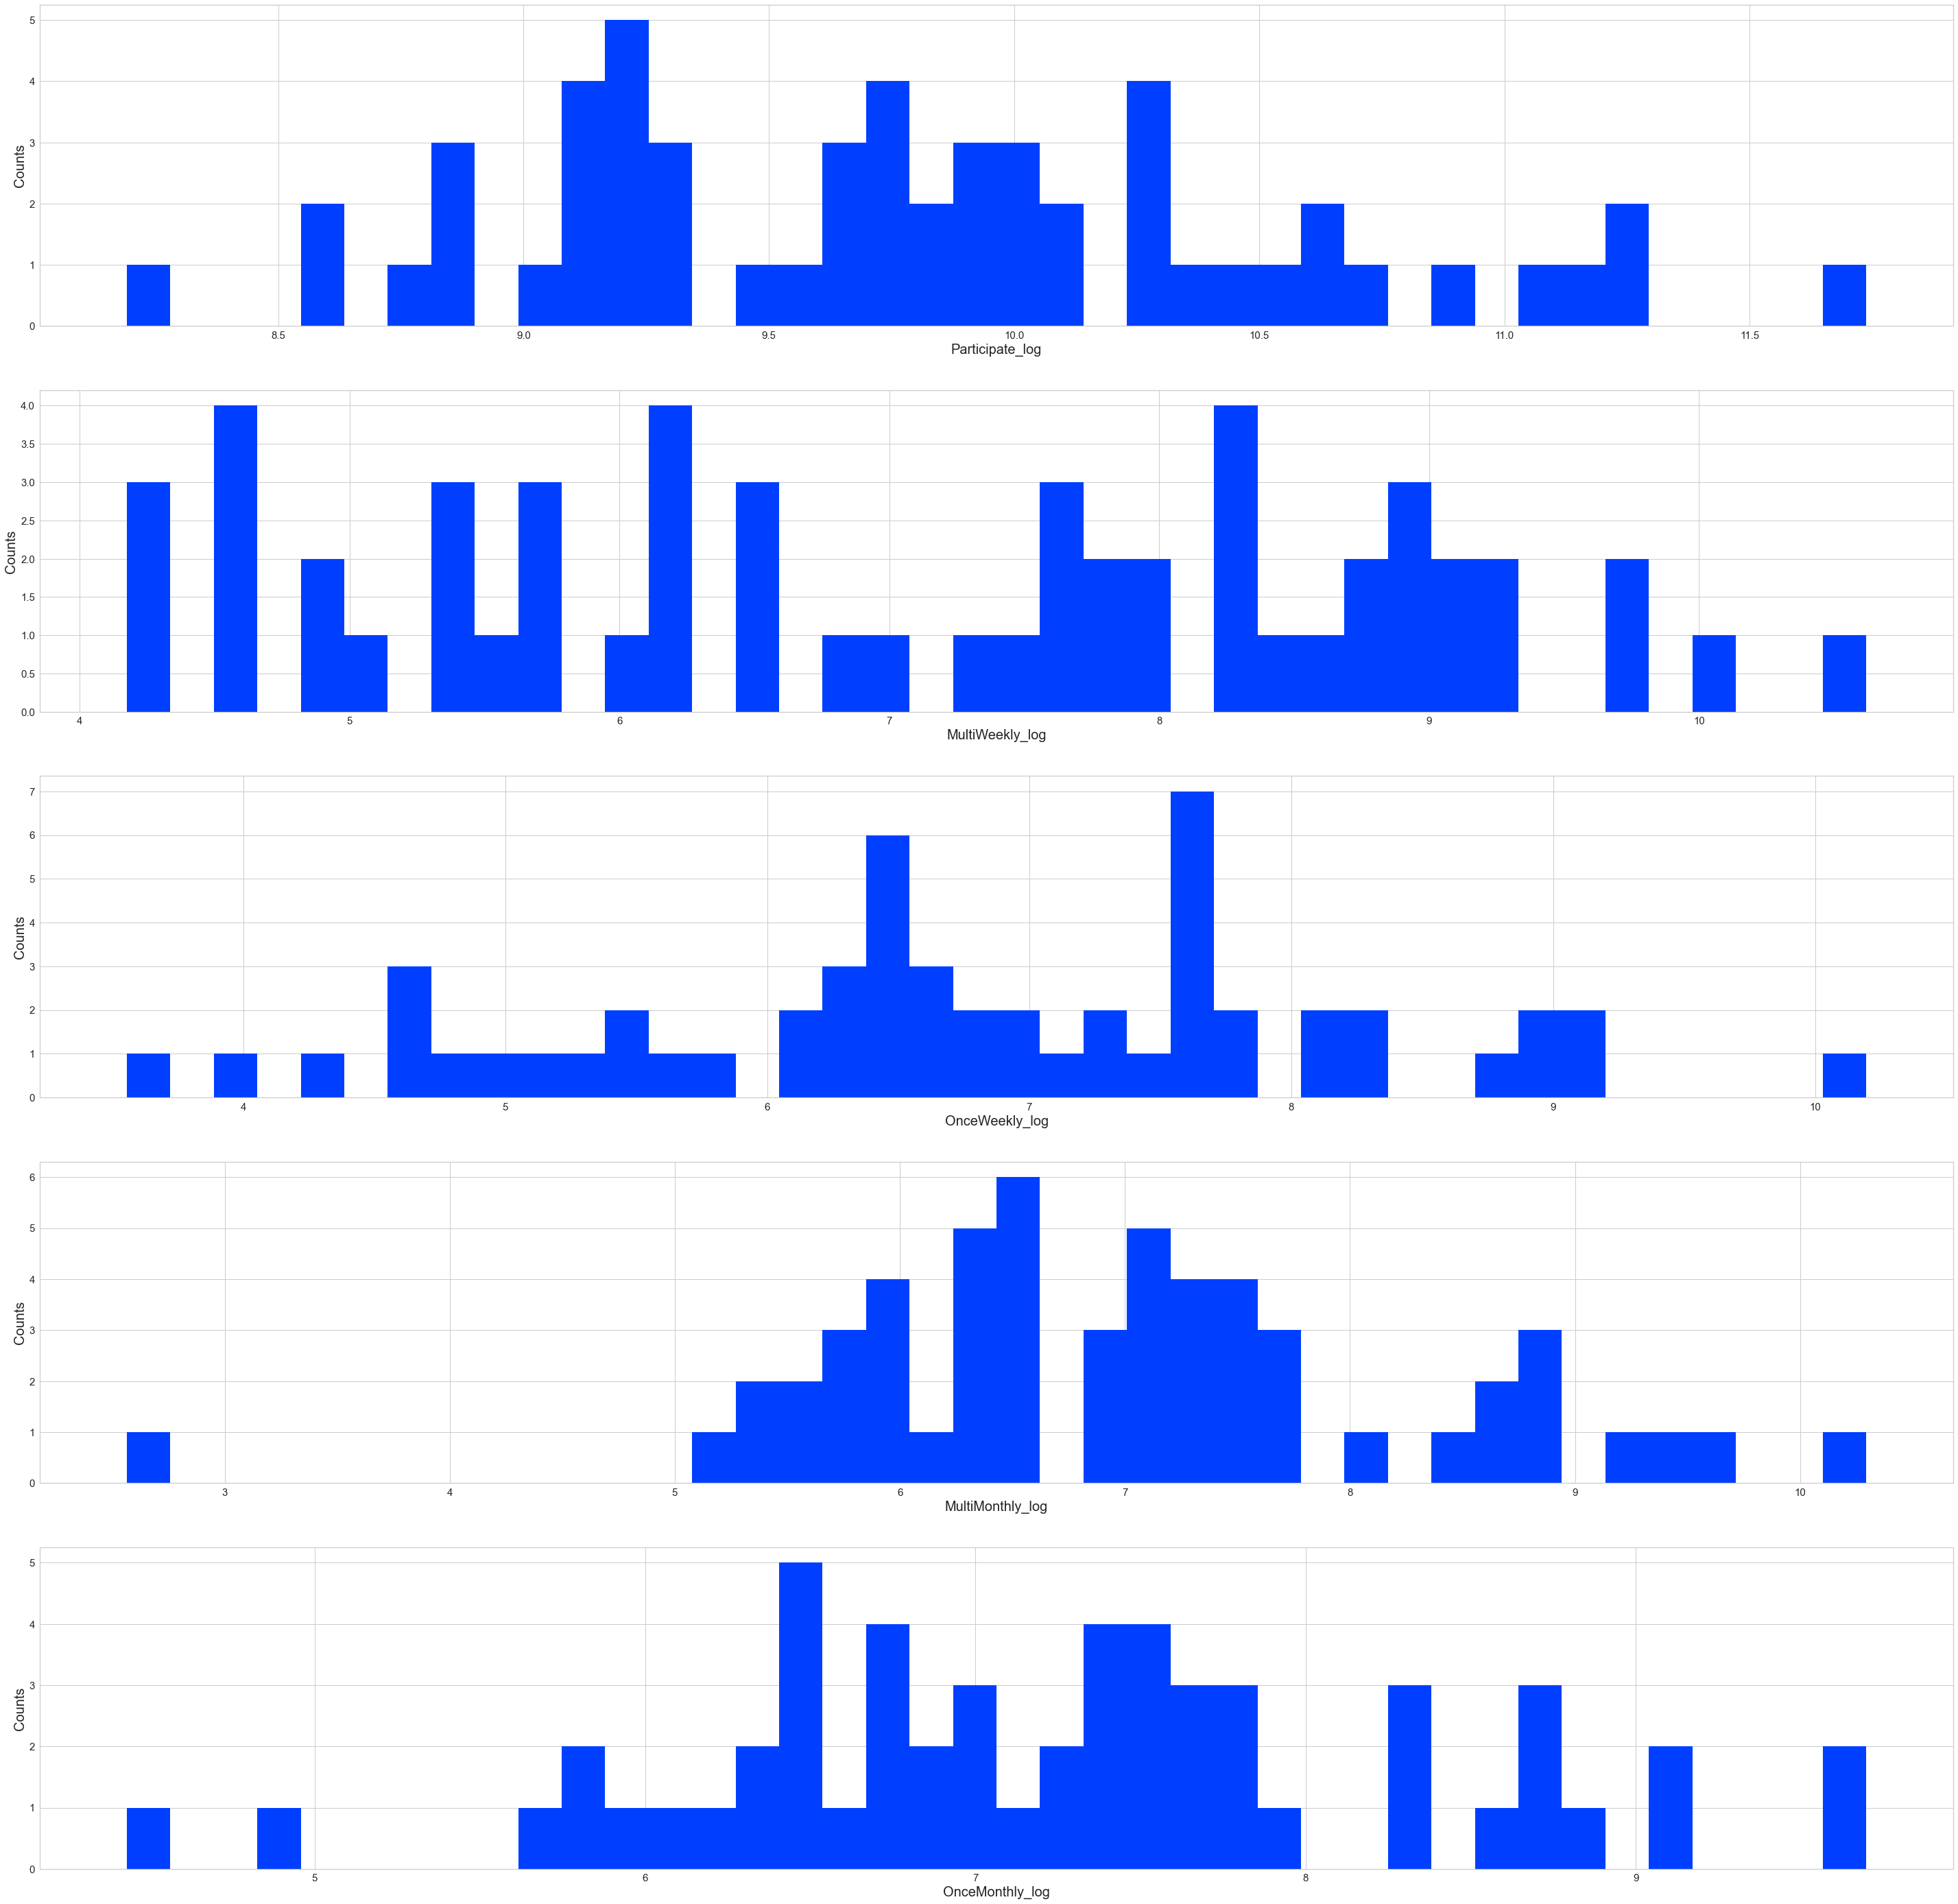

In [8]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (50, 50)
fig, axes = plt.subplots(nrows = 5, ncols = 1)

log_features = ['Participate_log', 'MultiWeekly_log', 'OnceWeekly_log', 'MultiMonthly_log', 'OnceMonthly_log']
xaxes = log_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts', 'Counts']
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[log_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

plt.show()

In [9]:
features_model = ['Participate_log', 'MultiWeekly_log', 'OnceWeekly_log', 'MultiMonthly_log', 'OnceMonthly_log']
data_model_X = pd.concat([data[features_model]], axis=1)
data_model_y = data.replace({'Locality': {1: 'Local', 0: 'Remote'}})['Locality']

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

print('\n')
print('No. of Local and Remote activities in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of Local and Remote activities in the validation set:')
print(y_val.value_counts())

No. of samples in training set:  38
No. of samples in validation set: 17


No. of Local and Remote activities in the training set:
Local     26
Remote    12
Name: Locality, dtype: int64


No. of Local and Remote activities in the validation set:
Remote    10
Local      7
Name: Locality, dtype: int64


C:\Users\mithr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


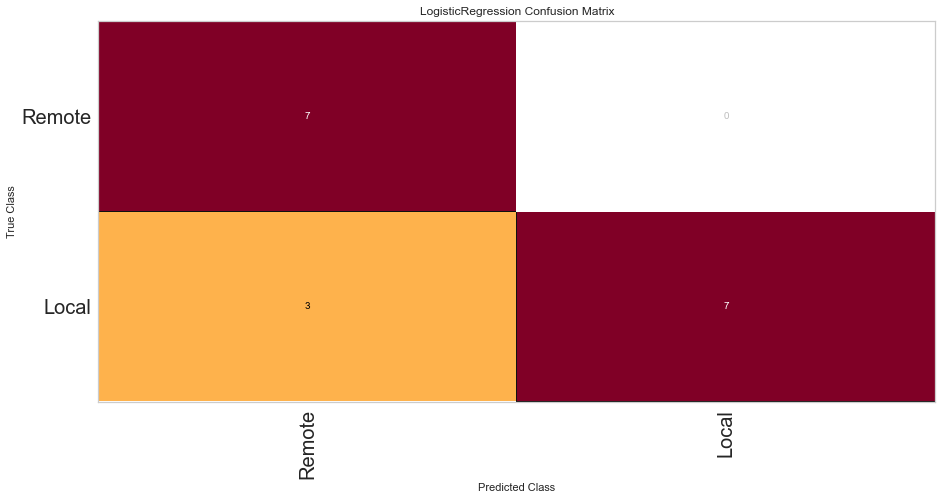

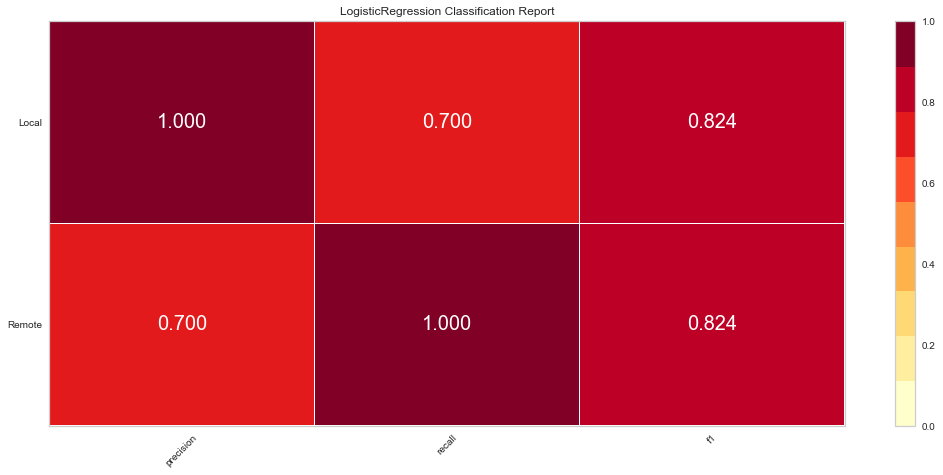

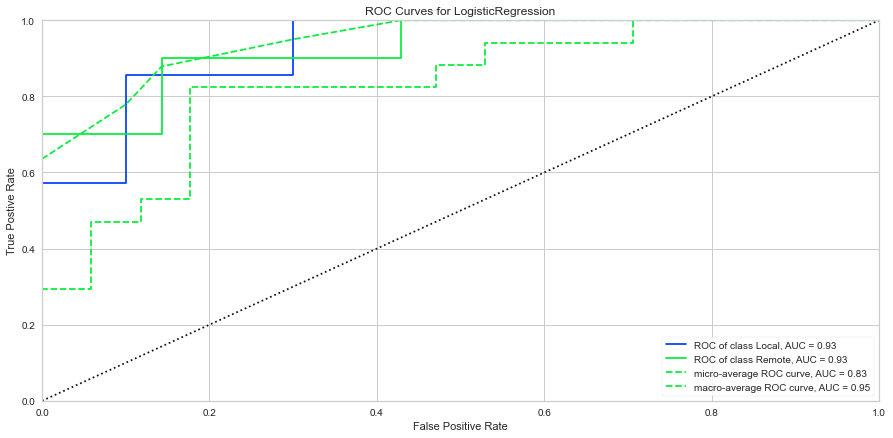

In [11]:
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

model = LogisticRegression()
classes = ['Remote','Local']
cm = ConfusionMatrix(model, classes=classes, percent=False)
cm.fit(X_train, y_train)
cm.score(X_val, y_val)

for label in cm.ax.texts:
    label.set_size(10)

cm.poof()

%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

visualizer = ClassificationReport(model, classes=classes)
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)
g = visualizer.poof()
visualizer = ROCAUC(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)
g = visualizer.poof()